# PERKENALAN DATASET
Sumber dataset: Kaggle (https://www.kaggle.com/datasets/mosapabdelghany/medical-insurance-cost-dataset)

Dataset ini berisi informasi biaya asuransi medis untuk 1.338 individu. Di dalamnya terdapat variabel demografis dan terkait kesehatan seperti usia, jenis kelamin, BMI, jumlah anak, status merokok, dan wilayah tempat tinggal di AS.

**Variabel target** adalah `charges`, yaitu biaya asuransi medis yang ditagihkan kepada individu.

### Penggunaan Umum
* Pemodelan regresi
* Riset ekonomi kesehatan
* Analisis penetapan harga asuransi
* Edukasi dan tutorial *machine learning*

---

### Detail Kolom (Data Dictionary)

* **`age`** *(int)*: Usia penerima manfaat utama.
* **`sex`** *(categorical)*: Jenis kelamin penerima manfaat (*male, female*).
* **`bmi`** *(float)*: *Body Mass Index*, ukuran lemak tubuh berdasarkan tinggi dan berat.
* **`children`** *(int)*: Jumlah anak yang ditanggung asuransi kesehatan.
* **`smoker`** *(categorical)*: Status merokok penerima manfaat (*yes, no*).
* **`region`** *(categorical)*: Wilayah tempat tinggal di AS (*northeast, northwest, southeast, southwest*).
* **`charges`** *(float)*: Biaya asuransi medis yang ditagihkan.

---

### Potensi Penggunaan
1. Membangun model prediktif untuk biaya medis.
2. Mengeksplorasi pengaruh merokok dan BMI terhadap `charges`.
3. Mengajarkan regresi dan rekayasa fitur kepada siswa.
4. Menganalisis tren keterjangkauan layanan kesehatan.

In [24]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.preprocessing import StandardScaler

# EKSPLORASI DATA

In [14]:
data = pd.read_csv('https://drive.google.com/uc?id=1ai8yBmLG_HalsLsGyxK2xGRmcv-RAkR-&export=download')

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [22]:
print(data.duplicated().sum())

1


In [23]:
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts(), "\n")

sex
male      676
female    662
Name: count, dtype: int64 

smoker
no     1064
yes     274
Name: count, dtype: int64 

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



<Axes: >

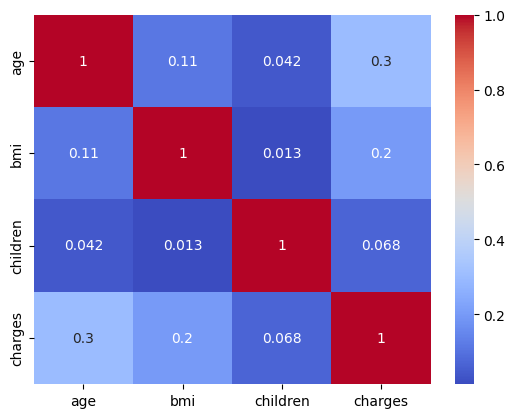

In [25]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')

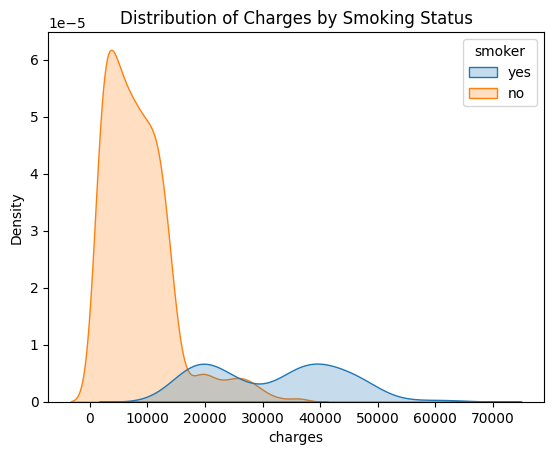

In [26]:
sns.kdeplot(data=data, x="charges", hue="smoker", fill=True)
plt.title("Distribution of Charges by Smoking Status")
plt.show()

# PREPROCESSING

In [27]:
df_clean = data.copy()

df_clean.drop_duplicates(inplace=True)

# Sex: male -> 0, female -> 1
df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})

# Smoker: no -> 0, yes -> 1
df_clean['smoker'] = df_clean['smoker'].map({'no': 0, 'yes': 1})

# We use drop_first=True to reduce redundancy (Dummy Variable Trap)
df_clean = pd.get_dummies(df_clean, columns=['region'], prefix='loc', drop_first=True)

numeric_features = ['age', 'bmi', 'children'] # We don't scale 'charges' usually until modeling, or we leave it.

for col in numeric_features:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    original_len = len(df_clean)
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

scaler = StandardScaler()
df_clean[numeric_features] = scaler.fit_transform(df_clean[numeric_features])

df_clean.head()

,age,sex,bmi,children,smoker,charges,loc_northwest,loc_southeast,loc_southwest
0,-1.440429,1,-0.445495,-0.908563,1,16884.92400,False,False,True
1,-1.511669,0,0.546068,-0.080442,0,1725.55230,False,True,False
2,-0.799261,0,0.415999,1.575799,0,4449.46200,False,True,False
3,-0.443056,0,-1.323037,-0.908563,0,21984.47061,True,False,False
4,-0.514297,0,-0.279953,-0.908563,0,3866.85520,True,False,False


In [28]:
import os

# Define output
output_dir = 'insurance_preprocessing'
os.makedirs(output_dir, exist_ok=True)

output_file = os.path.join(output_dir, 'insurance_clean.csv')

# Save
df_clean.to_csv(output_file, index=False)
print(f"File saved successfully at: {output_file}")

File saved successfully at: insurance_preprocessing/insurance_clean.csv
